In [3]:
inputs = [int(line) for line in open("input.txt") if line.strip()]
inputs[:5]

[1293, 1207, 1623, 1675, 1842]

In [11]:
%%time
# find two entries that sum to 2020
for i in inputs:
    for j in inputs:
        if i + j==2020:
            print(i, j, i*j)

1486 534 793524
534 1486 793524
CPU times: user 4.9 ms, sys: 171 µs, total: 5.07 ms
Wall time: 5.01 ms


In [10]:
%%time
# find three entries that sum to 2020. This time, be a tiny bit more clever
l = len(inputs)
for i in range(l):
    for j in range(i, l):
        for k in range(j, l):
            ii, ij, ik = inputs[i], inputs[j], inputs[k]
            if ii + ij + ik == 2020:
                print(ii*ij*ik)

61515678
CPU times: user 476 ms, sys: 4.54 ms, total: 481 ms
Wall time: 480 ms


In [12]:
%%time
# we could eliminate rows where i+j > 2020
l = len(inputs)
for i in range(l):
    for j in range(i, l):
        if inputs[i]+inputs[j] >= 2020:
            continue
        for k in range(j, l):
            ii, ij, ik = inputs[i], inputs[j], inputs[k]
            if ii + ij + ik == 2020:
                print(ii*ij*ik)

61515678
CPU times: user 22.3 ms, sys: 700 µs, total: 23 ms
Wall time: 22.5 ms


In [22]:
%%time
# we could express things more clearly perhaps
l = len(inputs)
for i, ii in enumerate(inputs):
    for j, ij in enumerate(inputs[i+1:]):
        if ii + ij >= 2020:
            continue
        for k, ik in enumerate(inputs[i+j+1:]):
            if ii + ij + ik == 2020:
                print(ii*ij*ik)

61515678
CPU times: user 13.7 ms, sys: 753 µs, total: 14.4 ms
Wall time: 14 ms


In [30]:
import numpy as np
npinputs = np.array(inputs, dtype='int')
npinputs

array([1293, 1207, 1623, 1675, 1842, 1410,   85, 1108,  557, 1217, 1506,
       1956, 1579, 1614, 1360, 1544, 1946, 1666, 1972, 1814, 1699, 1778,
       1529, 2002, 1768, 1173, 1407, 1201, 1264, 1739, 1774, 1951, 1980,
       1428, 1381, 1714,  884, 1939, 1295, 1694, 1168, 1971, 1352, 1462,
       1828, 1402, 1433, 1542, 1144, 1331, 1427, 1261, 1663, 1820, 1570,
       1874, 1486, 1613, 1769, 1721, 1753, 1142, 1677, 2010, 1640, 1465,
       1171,  534, 1790, 2005, 1604, 1891, 1247, 1281, 1867, 1403, 2004,
       1668, 1416, 2001, 1359,  686, 1965, 1728, 1551, 1565, 1128, 1832,
       1757, 1350, 1808, 1711, 1799, 1590, 1989, 1547, 1140, 1905, 1368,
       1179, 1902, 1473, 1908, 1859, 1257, 1394, 1244, 1800, 1695, 1731,
       1474, 1781, 1885, 1154, 1990, 1929, 1193, 1302, 1831, 1226, 1418,
       1400, 1435, 1645, 1655, 1843, 1227, 1481, 1754, 1290, 1685, 1498,
         71, 1286, 1137, 1288, 1758, 1987, 1471, 1839, 1545, 1682, 1615,
       1475, 1849, 1985, 1568, 1795, 1184, 1863, 13

In [32]:
%%time
# very curious if this is faster, slower, or no diff with numpy?
l = len(npinputs)
for i, ii in enumerate(npinputs):
    for j, ij in enumerate(npinputs[i+1:]):
        if ii + ij >= 2020:
            continue
        for k, ik in enumerate(npinputs[i+j+1:]):
            if ii + ij + ik == 2020:
                print(ii*ij*ik)
# about 3x slower

61515678
CPU times: user 49.7 ms, sys: 2.33 ms, total: 52 ms
Wall time: 51.1 ms


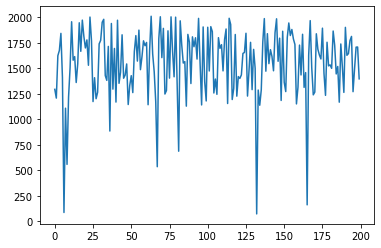

In [33]:
# and just for kicks, let's plot the numbers
import matplotlib.pyplot as plt
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(npinputs)  # Plot some data on the axes.